<a href="https://colab.research.google.com/github/godsofheaven/ID3-Implementation-/blob/main/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Chanakya Hosamani

USN - 1RV17CS035

Dataset - Fashion Mnist

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print('''| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |\n'''
'''This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images''')

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images


In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Number of training samples : %d '%X_train.shape[0])
print('Number of test samples : %d '%X_test.shape[0])

Number of training samples : 60000 
Number of test samples : 10000 


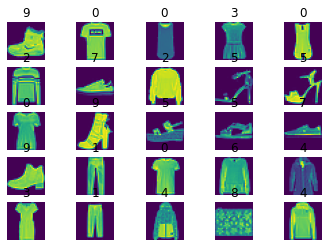

In [ ]:
number_of_images = 5 #per row
for i in range(number_of_images*number_of_images):
  plt.subplot(number_of_images, number_of_images, 1 + i).set_title(y_train[i])
  plt.axis('off')
  plt.imshow(X_train[i])
plt.show()

In [ ]:
#Before flattening X_train shape is
X_train.shape

(60000, 28, 28)

In [ ]:
#After flattening X_train shape is
flatten_X_train = X_train.reshape(X_train.shape[0],-1)
flatten_X_train.shape  #same 60000 samples , but now is in 1d

(60000, 784)

In [ ]:
pip install decision-tree-id3

     |████████████████████████████████| 163kB 5.3MB/s 
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-cp36-none-any.whl size=15963 sha256=a0e8c0563940847b64f61db0d4b16acac62d7ac08388de70ebc6a3d890955cdc
  Stored in directory: /root/.cache/pip/wheels/2d/d6/f2/96cb2cc307503a88b1235aef5c794990e460bd044f382070f9
Successfully built decision-tree-id3


In [ ]:
from id3 import Id3Estimator
from id3 import export_graphviz

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
estimator = Id3Estimator(max_depth = ,gain_ratio=True)
estimator.fit(flatten_X_train, y_train)

Id3Estimator(gain_ratio=True, is_repeating=False, max_depth=4,
             min_entropy_decrease=0.0, min_samples_split=2, prune=False)

In [ ]:
pred_is =estimator.predict(flatten_X_train)
print(100*np.sum(y_train == pred_is)/pred_is.shape[0])

37.53


In [ ]:
export_graphviz(estimator.tree_, 'tree.dot',list(range(0,int(28*28))) )
!dot -Tpdf tree.dot -o tree.pdf